In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./all_seasons.csv")

In [2]:

df['meters']=df.player_height/100 
df['bmi'] = (df.player_weight)/(df.meters*df.meters)





In [3]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,meters,bmi
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,1.9812,25.423271
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,2.1590,25.300753
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,2.0574,22.503352
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,2.0320,24.387706
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,2.0574,25.718116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,2.0828,25.094670
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,1.9558,25.494997
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,2.1336,25.906738
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,2.0828,24.153620


In [4]:
filter_out = df.bmi<34
df = df[filter_out]


In [5]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,meters,bmi
480,480,Oliver Miller,TOR,28.0,205.74,147.4174,Arkansas,USA,1992,1,...,3.1,-9.9,0.099,0.177,0.149,0.485,0.187,1997-98,2.0574,34.826616
1161,1161,Oliver Miller,SAC,29.0,205.74,147.4174,Arkansas,USA,1992,1,...,0.0,-18.8,0.194,0.038,0.177,0.455,0.000,1998-99,2.0574,34.826616


In [49]:
df['bmi_range'] = round(df.bmi)
# Group by draft year
df = df.groupby("bmi_range").mean()

# Selecting only age column
df = df[["net_rating"]]


/var/folders/sj/1zv4f6fs0_17qjxyxqnclddw0000gn/T/ipykernel_32207/2032108347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_range'] = round(df.bmi)


In [50]:
df

,net_rating
bmi_range,
20.0,-6.287500
21.0,-4.260366
22.0,-2.969129
23.0,-2.111729
24.0,-2.095471
25.0,-1.766802
26.0,-2.053687
27.0,-2.321863
28.0,-1.649637


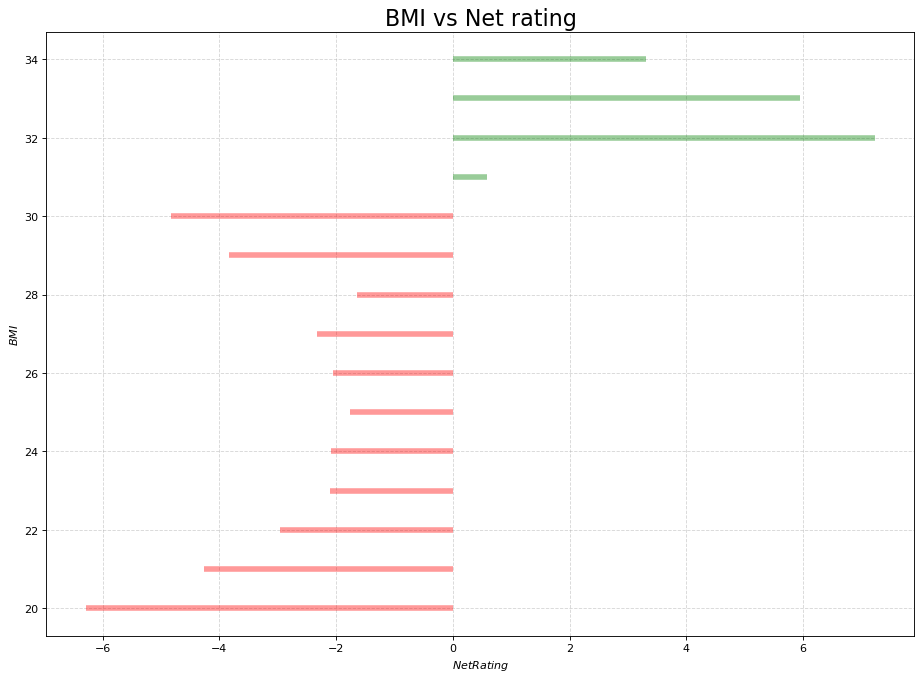

In [51]:
df['colors'] = ['red' if x < 0 else 'green' for x in df['net_rating']]
plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.net_rating, color=df.colors, alpha=0.4, linewidth=5)

plt.gca().set(ylabel='$BMI$', xlabel='$Net Rating$')
plt.title('BMI vs Net rating', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()